# 2 Aplicación de algoritmos de clustering particional


## Importación de librerías necesarias

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

## Lectura del dataset

In [10]:
df = pd.read_csv('/content/sample_data/Tourists_data.csv')

## 2.1 Preprocesado

Correspondiente con :
- **Tarea 3.1**: Realiza el pre-procesamiento necesario para poder aplicar algoritmos de clustering particional.

### Eliminamos los valores

Se eliminan los valores que se nos ha dicho que se pueden descartar y los valores nulos

In [11]:
df = df.drop(columns=['A0', 'A0_1', 'A0_7', 'factoregatur'])
df =  df.dropna()

Se hace un undersamplig para que se pueda ejecutar en el entorno

In [12]:
dataframe_sampled=df.sample(frac=0.1, random_state=1)

##2.2 Establecer número de clusters y variación

Correspondiente con:
- **Tarea 3.2**: Establece el número más adecuado de clusters para el dataset proporcionado. Ayúdate de los métodos vistos (al menos 2) en la asignatura, así como de gráficas para justificar la decisión. Compara los resultados que obtienes con cada método.

- **Tarea 3.3**: ¿Cómo varía la calidad del clustering con diferentes valores de 'K'?

Es cogemos dos métodos:
- Método del codo

- Metodo de la silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

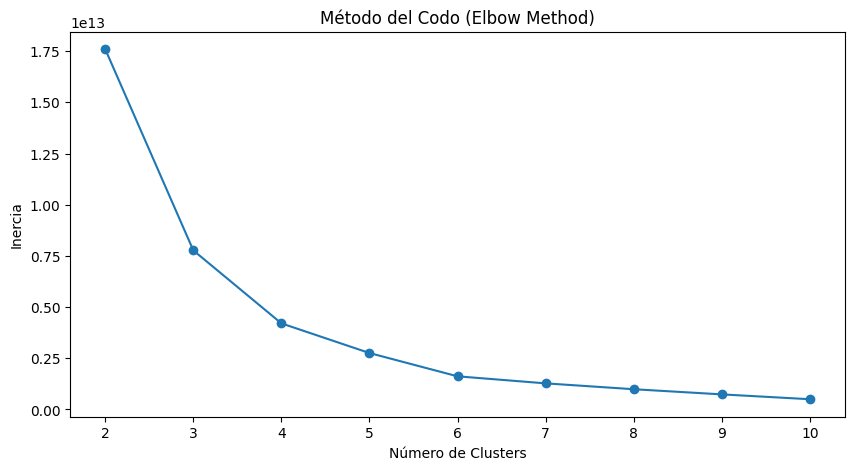

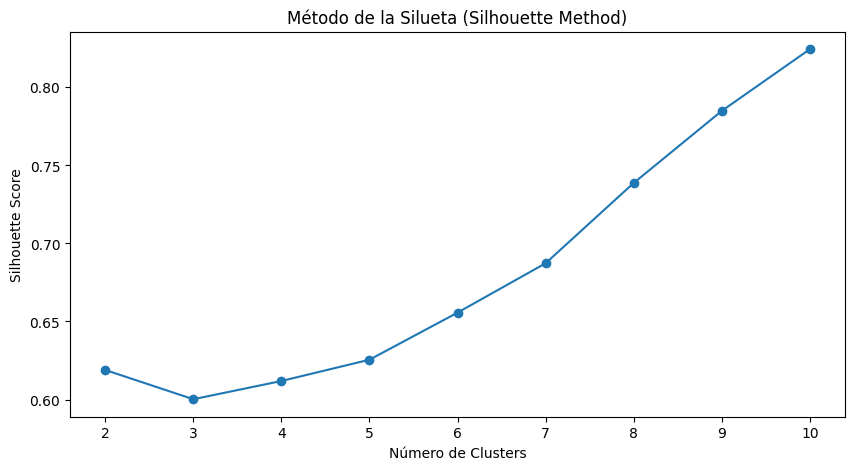

In [13]:
X=dataframe_sampled.copy()
# Inicializar listas para almacenar los valores de inercia y silhouette_score
inertia = []
silhouette_scores = []

# Supongamos que quieres probar un rango de posibles números de clusters (por ejemplo, de 2 a 10)
n_clusters_range = range(2, 11)

# Calcular inercia y silhouette_score para cada número de clusters
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Calcular la inercia (suma de distancias al cuadrado de las muestras a su centroide más cercano)
    inertia.append(kmeans.inertia_)

    # Calcular el silhouette_score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Graficar la curva del Método del Codo (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo (Elbow Method)')
plt.show()

# Graficar la curva del Método de la Silueta (Silhouette Method)
plt.figure(figsize=(10, 5))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Método de la Silueta (Silhouette Method)')
plt.show()

Según vemos en la gráfica, **el número de clusters óptimo es 10** ya que es el que tiene mayor índice de Silhouette.

## 2.3 Estadísticas de los clusters
Correspondiente con:
- **Tarea 3.4**: Con el número más adecuado de clusters, ayúdate de estadísticas para analizar a los viajeros incluidos en cada cluster

**Tarea 3.5** respondida en la memoria.

Como en el apartado anterior llegamos a la conclusión de que el número óptimo de clusters es 10, en este apartado lo tomaremos como n_clusters_optimo.

In [14]:
Y=dataframe_sampled.copy()
n_clusters_optimo=10
kmeans = KMeans(n_clusters=n_clusters_optimo, random_state=42)
kmeans.fit(Y)

# Agregar las etiquetas de clusters al DataFrame original
dataframe_clustered = Y.copy()
dataframe_clustered['Cluster'] = kmeans.labels_

# Calcular estadísticas para cada cluster
cluster_stats = dataframe_clustered.groupby('Cluster').describe()

# Mostrar las estadísticas de cada cluster
print(cluster_stats)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        mm_aaaa                                                            \
          count           mean          std       min       25%       50%   
Cluster                                                                     
0        4900.0   52019.213061     2.459534   52016.0   52017.0   52019.0   
1        6426.0   92019.397603     2.291759   92016.0   92017.0   92019.0   
2        8720.0   17056.012729  5000.151989   12016.0   12019.0   22016.0   
3        8502.0  116813.093037  4996.030431  112016.0  112019.0  112022.0   
4        6825.0   72019.308864     2.318908   72016.0   72017.0   72019.0   
5        4687.0   32019.303392     2.420595   32016.0   32017.0   32019.0   
6        6937.0   82019.390226     2.305923   82016.0   82017.0   82019.0   
7        5170.0  102018.966731     2.012645  102016.0  102017.0  102019.0   
8        5183.0   62019.354042     2.430323   62016.0   62017.0   62019.0   
9        4772.0   42019.286253     2.487486   42016.0   42017.0   42019.0   